In [1]:
#Name: Yatesh Chaudhary
#Registeration No: 20BCB0112

In [2]:
# 1. Loading the dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# 2. Load the dataset
df = pd.read_csv('titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


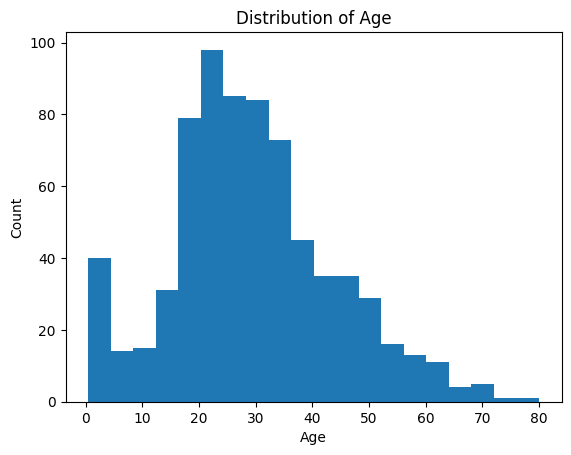

In [9]:
# 3. Perform Visualization
# Univariate Analysis
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

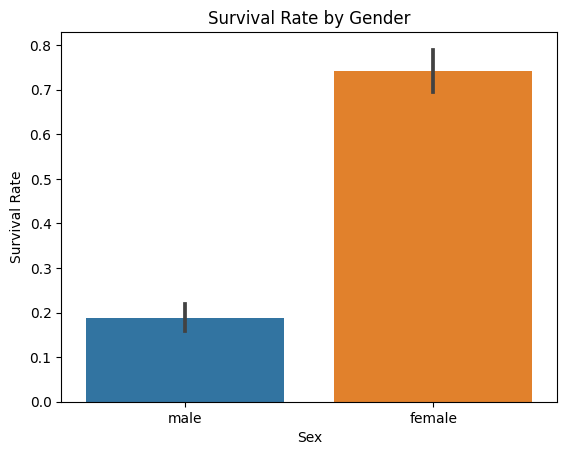

In [10]:
# Bi-Variate Analysis
sns.barplot(x='sex', y='survived', data=df)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()

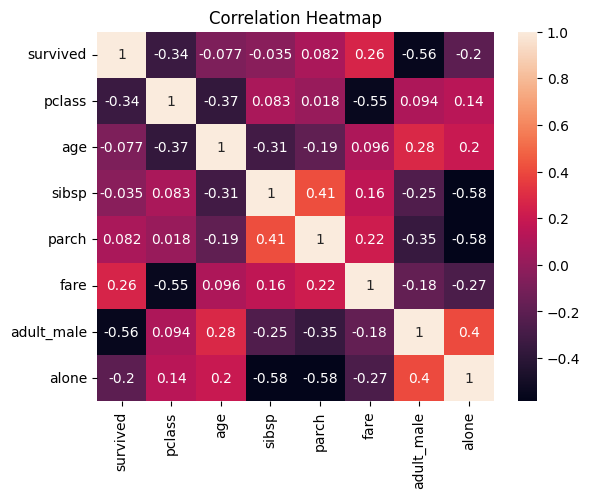

In [11]:
# Multi-Variate Analysis
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# 4. Perform descriptive statistics
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [12]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
# 5. Handle missing values
df['age'].fillna(df['age'].mean(), inplace=True)

<AxesSubplot: >

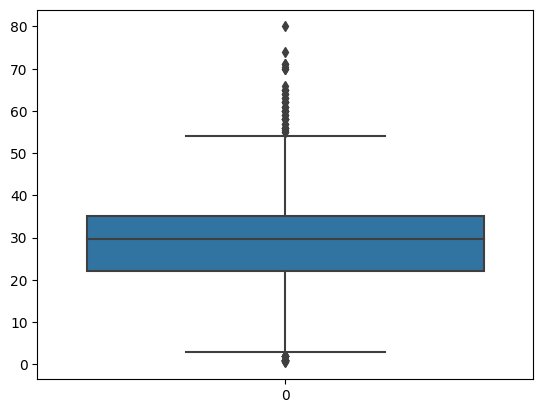

In [14]:
sns.boxplot(df.age)

In [15]:
from scipy.stats import mstats

df['age'] = mstats.winsorize(df['age'], limits=[0.05, 0.05])

<AxesSubplot: >

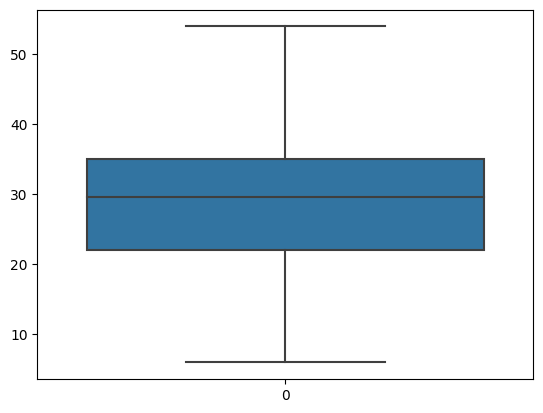

In [16]:
sns.boxplot(df.age)

In [21]:
# Preprocessing the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.sex = le.fit_transform(df.sex)
df.alive = le.fit_transform(df.alive)
df.adult_male = le.fit_transform(df.adult_male)
df.alone = le.fit_transform(df.alone)
df.who = le.fit_transform(df.who)
df.embarked = le.fit_transform(df.embarked)
df.embark_town = le.fit_transform(df.embark_town)
df.deck = le.fit_transform(df.deck)
df.division = le.fit_transform(df.division)

In [22]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'division', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [23]:
df_cols = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'division', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone']
df.columns = df_cols
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'division', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,division,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,7,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,7,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,7,2,0,1


In [25]:
# Assigning the values to the dependent and non-dependent variable
X = df.drop('survived', axis=1)
y = df['survived']

In [26]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,division,who,adult_male,deck,embark_town,alive,alone
0,3,1,22.0,1,0,7.2500,2,2,1,1,7,2,0,0
1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,1,0
2,3,0,26.0,0,0,7.9250,2,2,2,0,7,2,1,1
3,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
4,3,1,35.0,0,0,8.0500,2,2,1,1,7,2,0,1


In [27]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.82737724,  0.73769513, -0.64009856, ...,  0.58111394,
        -0.78927234, -1.2316449 ],
       [-1.56610693, -1.35557354,  0.72641763, ..., -1.93846038,
         1.2669898 , -1.2316449 ],
       [ 0.82737724, -1.35557354, -0.29846951, ...,  0.58111394,
         1.2669898 ,  0.81192233],
       ...,
       [ 0.82737724, -1.35557354,  0.017462  , ...,  0.58111394,
        -0.78927234, -1.2316449 ],
       [-1.56610693,  0.73769513, -0.29846951, ..., -1.93846038,
         1.2669898 ,  0.81192233],
       [ 0.82737724,  0.73769513,  0.21397406, ..., -0.67867322,
        -0.78927234,  0.81192233]])

In [29]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [30]:
X_train

array([[-1.56610693,  0.73769513, -2.00661474, ...,  0.58111394,
         1.2669898 , -1.2316449 ],
       [ 0.82737724,  0.73769513,  0.017462  , ...,  0.58111394,
        -0.78927234,  0.81192233],
       [ 0.82737724, -1.35557354, -2.00661474, ...,  0.58111394,
         1.2669898 , -1.2316449 ],
       ...,
       [ 0.82737724,  0.73769513,  0.98263941, ...,  0.58111394,
        -0.78927234, -1.2316449 ],
       [-1.56610693, -1.35557354, -1.32335665, ...,  0.58111394,
         1.2669898 , -1.2316449 ],
       [-1.56610693,  0.73769513, -0.72550582, ...,  0.58111394,
        -0.78927234, -1.2316449 ]])

In [31]:
X_test

array([[ 0.82737724,  0.73769513,  0.017462  , ..., -1.93846038,
         1.2669898 , -1.2316449 ],
       [-0.36936484,  0.73769513,  0.1285668 , ...,  0.58111394,
        -0.78927234,  0.81192233],
       [ 0.82737724,  0.73769513, -0.81091308, ...,  0.58111394,
        -0.78927234,  0.81192233],
       ...,
       [-1.56610693,  0.73769513,  2.09293381, ...,  0.58111394,
        -0.78927234,  0.81192233],
       [ 0.82737724,  0.73769513, -1.06713486, ...,  0.58111394,
        -0.78927234,  0.81192233],
       [-1.56610693,  0.73769513, -0.12765499, ...,  0.58111394,
         1.2669898 ,  0.81192233]])

In [32]:
y_train

445    1
650    0
172    1
450    0
314    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: survived, Length: 623, dtype: int64

In [33]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
821    1
633    0
456    0
500    0
430    1
Name: survived, Length: 268, dtype: int64